<a href="https://colab.research.google.com/github/ethane66/MSFT-Talent-AI/blob/main/Session_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2025-03-04 17:32:22--  https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57018 (56K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  55.68K  --.-KB/s    in 0.001s  

2025-03-04 17:32:22 (43.9 MB/s) - ‘titanic.csv’ saved [57018/57018]

Estadísticas descriptivas de Fare:
 count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64


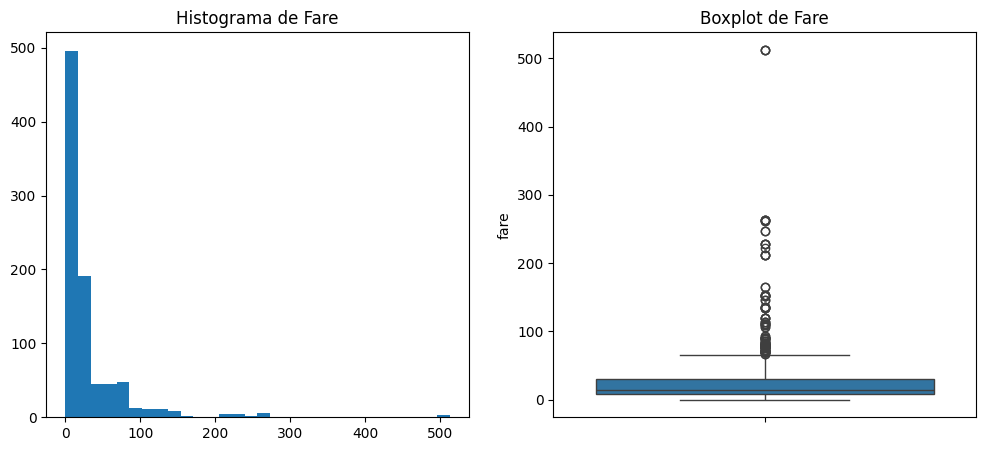


Valores atípicos detectados (IQR):
     survived  pclass     sex   age  sibsp  parch      fare embarked  class  \
1           1       1  female  38.0      1      0   71.2833        C  First   
27          0       1    male  19.0      3      2  263.0000        S  First   
31          1       1  female   NaN      1      0  146.5208        C  First   
34          0       1    male  28.0      1      0   82.1708        C  First   
52          1       1  female  49.0      1      0   76.7292        C  First   
..        ...     ...     ...   ...    ...    ...       ...      ...    ...   
846         0       3    male   NaN      8      2   69.5500        S  Third   
849         1       1  female   NaN      1      0   89.1042        C  First   
856         1       1  female  45.0      1      1  164.8667        S  First   
863         0       3  female   NaN      8      2   69.5500        S  Third   
879         1       1  female  56.0      0      1   83.1583        C  First   

       who  adu

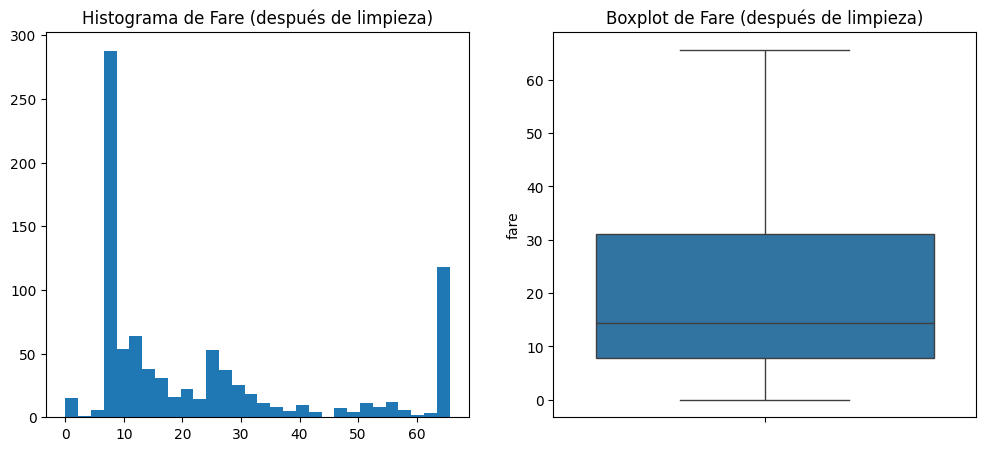

In [2]:
# prompt: https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv
# Instrucciones:
# Carga el dataset Titanic en Google Colab utilizando Pandas.
# Calcula las estadísticas descriptivas de la variable Fare utilizando .describe().
# Visualiza la distribución de Fare con un histograma y un boxplot.
# Detecta valores atípicos utilizando el método de Rango Intercuartil (IQR).
# Aplica una estrategia para manejar los valores atípicos:
# Opción 1: Eliminar los outliers.
# Opción 2: Reemplazar los outliers por la mediana.
# Muestra un resumen antes y después de la limpieza y explica en Markdown la estrategia elegida.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carga el dataset
!wget https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv
df = pd.read_csv('titanic.csv')

# Estadísticas descriptivas de Fare
print("Estadísticas descriptivas de Fare:\n", df['fare'].describe())

# Visualización de la distribución de Fare
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df['fare'], bins=30)
plt.title('Histograma de Fare')
plt.subplot(1, 2, 2)
sns.boxplot(y=df['fare'])
plt.title('Boxplot de Fare')
plt.show()


# Detección de valores atípicos usando IQR
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['fare'] < lower_bound) | (df['fare'] > upper_bound)]
print(f"\nValores atípicos detectados (IQR):\n{outliers}")


# Opción elegida: Reemplazar los outliers por la mediana
# Explicación: Se elige reemplazar por la mediana en lugar de eliminarlos
# para evitar una pérdida significativa de datos. La mediana es menos sensible
# a valores extremos que la media, proporcionando un valor central más robusto.

median_fare = df['fare'].median()
df['fare'] = df['fare'].clip(lower=lower_bound, upper=upper_bound)

# Resumen antes y después de la limpieza
print("\nEstadísticas descriptivas de Fare después de reemplazar outliers por la mediana:\n", df['fare'].describe())

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df['fare'], bins=30)
plt.title('Histograma de Fare (después de limpieza)')
plt.subplot(1, 2, 2)
sns.boxplot(y=df['fare'])
plt.title('Boxplot de Fare (después de limpieza)')
plt.show()
